# Проверка гипотез по увеличению выручки в интернет-магазине и оценка результатов A/B теста

**Цель:** Приоритезировать гипотезы и произвести оценку результатов A/B-тестирования.

**Описание:** Подготовлен список гипотез для увеличения выручки интернет-магазина. Проведена приоретизация гипотез по фреймворкам ICE и RICE. Также проведен анализ A/B-тестирования по разным показателям: пострены графики кумулятивной выручки, среднего чека, конверсии по группам, посчитана статистическая значимость различий конверсий и средних чеков по сырым и очищенным данным. Написаны общие и промежуточные выводы, принято решение о нецелесообразности дальнейшего проведения теста.

---
Для этого исследования использовал:
- 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- Выгрузки результатов A/B теста в двух файла

---

В работе использовал библиотеки *pandas, numpy, scipy, datetime, matplotlib*

### Содержание проекта

[**Часть 1. Приоретизация гипотез**](#часть1)

- [Вывод первой части](#вывод1)

[**Часть 2. Анализ A/B теста**](#часть2)

- [Подготовка данных](#подготовка_данных)

- [2.1. График кумулятивной выручки по группам](#2.1)

- [2.2. График кумулятивного среднего чека по группам](#2.2)

- [2.3. График относительного изменения кумулятивного среднего чека группы B к группе A](#2.3)

- [2.4. График кумулятивного среднего количества заказов на посетителя по группам](#2.4)

- [2.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#2.5)

- [2.6. Точечный график количества заказов по пользователям](#2.6)

- [2.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя](#2.7)

- [2.8. Построим точечный график стоимостей заказов](#2.8)

- [2.9. Посчитаем 95-й и 99-й перцентили стоимости заказов](#2.9)

- [2.10 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#2.10)

- [2.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#2.11)

- [2.12. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#2.13)

- [2.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#2.13)

[**Общие выводы**](#2.14)

In [1]:
# подключим нужные библиотеки

import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt

In [2]:
# выгрузим данные

try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),  # гипотезы
    pd.read_csv('orders.csv'),  # покупки
    pd.read_csv('visitors.csv'),  # посетители
)
except:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv'), 
)

### <a id='часть1'>Часть 1. Приоритезация гипотез</a>

In [3]:
# изучим таблицу с гипотезами

display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


*Описание:*

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
# приведём столбцы к нижнему регистру для удобства

hypothesis.columns = [x.lower() for x in hypothesis.columns.values]

In [5]:
# расчитаем ICE для гипотез и добавим соответствующий столбец
hypothesis['ICE'] = (
     (hypothesis['impact'] * hypothesis['confidence']) /
    hypothesis['efforts']
)

In [6]:
# отсортируем по убыванию приоритета и выведем гипотезы

pd.options.display.max_colwidth = 210

display(hypothesis.sort_values(by='ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [7]:
# расчитаем RICE для гипотез и добавим соответствующий столбец

hypothesis['RICE'] = (
     (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) /
    hypothesis['efforts']
)

In [8]:
# отсортируем по убыванию приоритета и выведем гипотезы

display(hypothesis.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


<a id='вывод1'>***Вывод по первой части:***</a>
- Изменения на сайте влияют непосредственно на реального посетителя, а реклама - на потенциального посетителя сайта
- При применении "RICE" вместо "ICE" на первое место вышли гипотезы которые работают с посетителями сайта. Гипотезы же рекламно-маркетнговые ушли ниже. Это связанно с учётом показателя REACH, который как раз говорит о том, сколько пользователей заденут изменения.

### <a id='часть2'>Часть 2. Анализ A/B теста</a>

<a id='подготовка_данных'>**Подготовим данные для анализа и дальнейшей работы**</a>

Подготовим данные из таблиц 'orders' и 'visitors'

Начнём с таблицы 'orders'

In [9]:
# выведем информаци о 'orders'

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# переименуем некоторые столбцы

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [11]:
# изменим тип данных столбца 'date'

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders.shape

(1197, 5)

In [13]:
# удалим явные дубликаты

orders = orders.drop_duplicates()

orders.shape

(1197, 5)

In [14]:
# проверим столбец с датами

print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [15]:
# проверим значения в столбце 'revenue'

orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Видим что есть аномальное значения:
- медианное значение заказа около 3 тысяч
- минимальное значени заказа в 50 руб. можем считать аномально низким
- максимальное значение 1.2 млн - аномально высокое

Такие аномальные значения могут вносить искажения в дальнейшем анализе. Поэтому их надо удалить. Посмотрим подробнее на аномальные значения

In [16]:
# посчитаем перцентили для определения как распределены суммы заказов

print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Видим что у 1% пользователей сумма заказа превышает 58 тыс. руб.

Построим график, указав диапозон от 0 до 58233 для определения границы по которой будем отсекать данные

<AxesSubplot:>

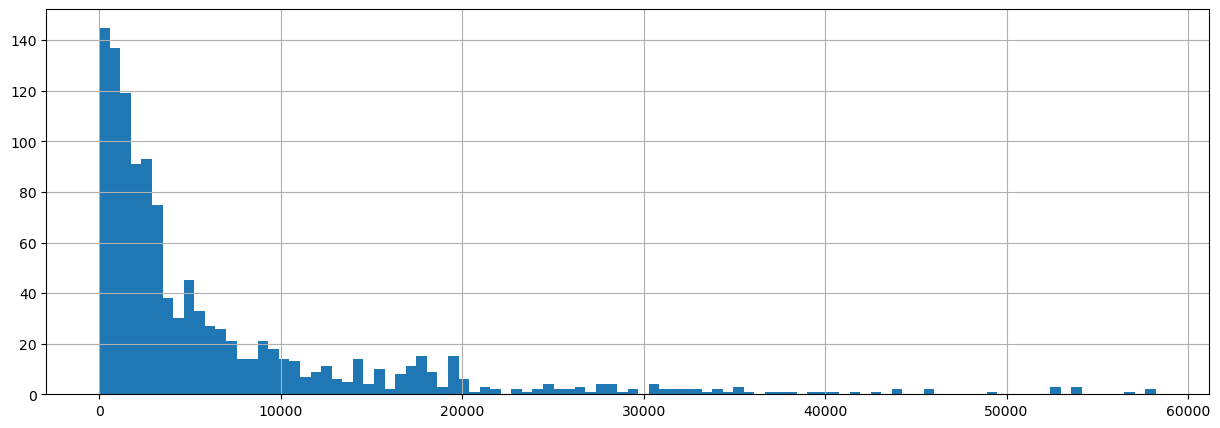

In [17]:
orders['revenue'].hist(bins=100, figsize=(15, 5), range = (0, 58233))

Из графика видим что основная часть заказов стоимостью до 40000

Поэтому заказы со значением выше можем отсечь

In [18]:
# удаляем значения по установленной границе в стоимости заказа 40000 рублей

orders = orders[orders['revenue'] < 40000]

Заказы с аномально низкой стоимостью не так сильно влияют на результат. Поэтому их удалять не будем

In [19]:
# посмотрим данные столбца 'group'

orders['group'].unique()

array(['B', 'A'], dtype=object)

Посмотрели все столбцы, где нужно поменяли тип данных, удалили аномальные значения.

Теперь переходим к таблице 'visitors'

In [20]:
# посмотрим информацию о таблице

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
# удалим явные дубликаты

visitors = visitors.drop_duplicates()

visitors.shape

(62, 3)

In [22]:
# изменим тип данных столбца 'date'

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [23]:
# проверим столбец 'group'

visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [24]:
# посмотрим значения в столбце 'visitors'

visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Проверили данные в таблице 'visitors' и привели данные к нужному типу

In [25]:
# проверим сколько пользователей попали в обе группы

len(np.intersect1d(orders.query('group == "A"')['visitor_id'], orders.query(
'group == "B"')['visitor_id'], assume_unique = False))

56

In [26]:
# посмотрим какую долю от общего числа заказов составляют задублировавшиеся пользователи

len(np.intersect1d(orders.query('group == "A"')['visitor_id'], orders.query(
'group == "B"')['visitor_id'], assume_unique = False)) / len(orders)

0.04794520547945205

Количество дубликатов составило 4%, что не так много и на данном этапе можно принебречь, чтоб не потерять другие данные.

Вероятно это была техническая ошибка сбора данных.

### <a id='2.1'>2.1. Построим график кумулятивной выручки по группам</a>

In [27]:
# создадим массив уникальных пар дат и групп

datesGroups = orders[['date', 'group']].drop_duplicates()

In [28]:
# получаем агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [29]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [30]:
# объединяем кумулятивные данные в одной таблице

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

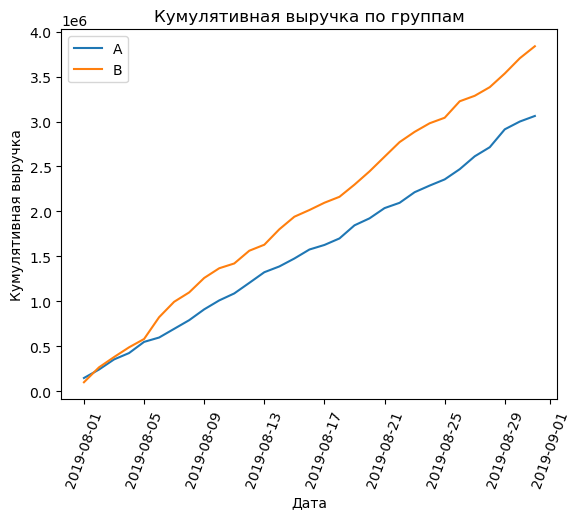

In [33]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')

plt.xticks(rotation=70)

plt.xlabel('Дата');
plt.ylabel('Кумулятивная выручка')

plt.legend()

plt.show()

***2.1. Промежуточный вывод:***

В первые дни теста график 'B' вырвался в лидеры за счёт небольшого скачка и продолжил лидировать в течение всего тестового периода

### <a id='2.2'>2.2. График кумулятивного среднего чека по группам</a>

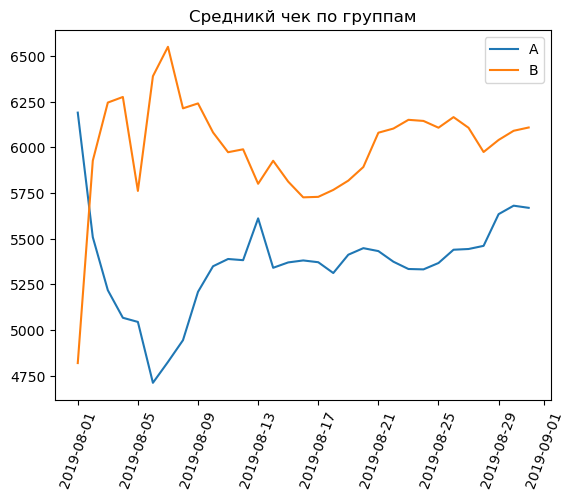

In [34]:
# для расчёта среднего чека
# разделим кумулятивную выручку на кумулятивное число заказов

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Средникй чек по группам')

plt.xticks(rotation=70)

plt.legend()

plt.show()

***2.2. Промежуточный вывод:***

- В первые дни для группы 'A' видно падение среднего чека с последующим повышением. Вероятно в начале теста было мало заказов и с небольшими суммами
- Для группы 'B' наоборот виден резкий рост с последующим плавным понижением. Видимо были достаточно дорогие заказы
- По итогам теста видно, что в группе 'B' средний чек выше чем в группе 'A' на протяжении всего теста

### <a id='2.3'>2.3. График относительного изменения кумулятивного среднего чека группы B к группе A</a>

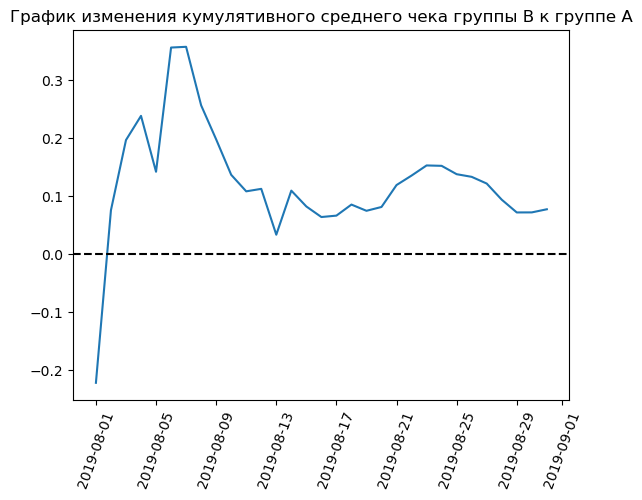

In [35]:
# собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График изменения кумулятивного среднего чека группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=70)

plt.show()

Мы рассматриваем кумулятивную выручку. В начале теста данные еще не успели "накопиться" и поэтому видны резкие скачки. С течением времени данных больше, скачки сглаживаются и можно видеть тенденцию графика

***2.3. Промежуточный вывод:***

- Средний чек в группе 'B' в первые дни был ниже чем в группе 'А', затем произошел скачок и спад
- Средний чек на протяжении всего периода имеет колебания и делать какие-то окончательные выводы рано

### <a id='2.4'>2.4. График кумулятивного среднего количества заказов на посетителя по группам</a>

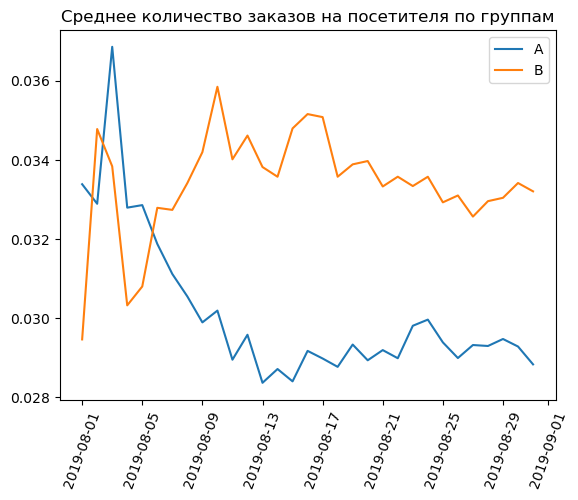

In [36]:
# строим графики заказов 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'] / cumulativeRevenueA['visitors'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'] / cumulativeRevenueB['visitors'], label='B')

plt.title('Среднее количество заказов на посетителя по группам')

plt.legend()

plt.xticks(rotation=70)

plt.show()

***2.4. Промежуточные выводы:***

- Количество заказов на старте тестирования было примерно одинаковым
- Спустя несколько дней в группе 'B' количество заказов стало увеличиваться, а в группе А резко уменьшаться
- К концу тестирования тенденция сохранилась и количество заказов на посетителя в группе 'B' больше чем в группе 'A'
- Тем не меннее видно, что к концу теста график количество заказов снижается и в группе 'B'

Группа 'B' показывает результаты лучше чем группа 'A'

### <a id='2.5'>2.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</a>

In [37]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

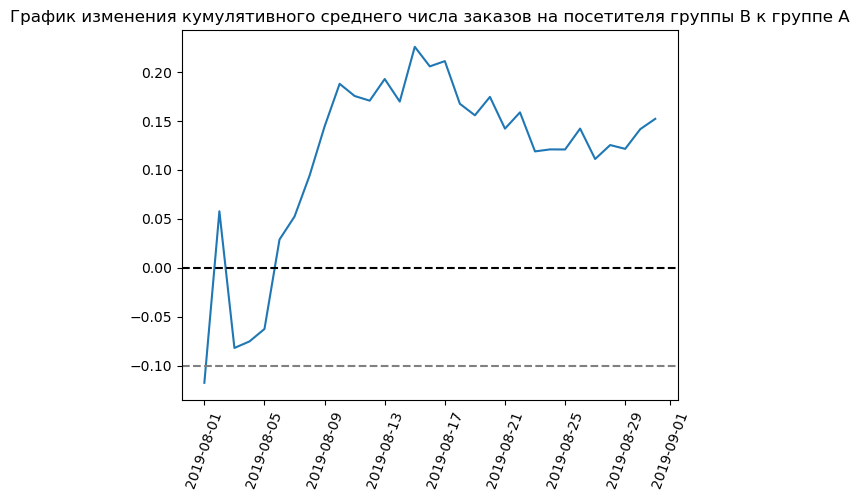

In [38]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('График изменения кумулятивного среднего числа заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xticks(rotation=70)

plt.show()

***2.5. Промежуточные выводы:***

- В начале теста конверсия группы 'B' была ниже коневерсии группы 'A', но со временем стала повышаться и стала выше
- Видны периодические колебания числа заказов

### <a id='2.6'>2.6. Точечный график количества заказов по пользователям</a>

In [39]:
# считаем количество заказов на одно пользователя

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

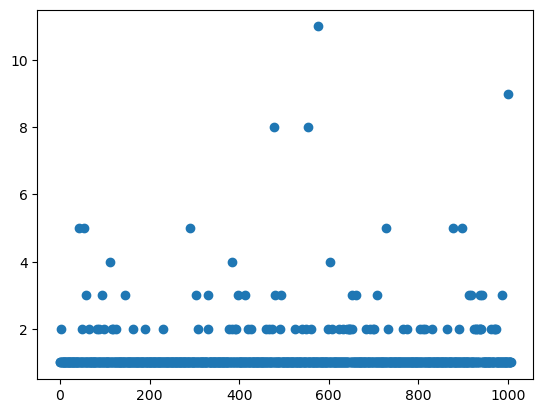

In [40]:
# построим график

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

***2.6. Промежуточный вывод:***

- Большая часть пользователей заказывает 1-2 товара
- Есть аномальные заказы, которые в дальнейшем можно исключить

### <a id='2.7'>2.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя</a>

In [41]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


***2.7. Промежуточный вывод***

- Видим, что не более чем у 1% пользователей 4 и более заказов
- Границей для определения аномальных значений в количестве заказов на пользователя возьмём 4 заказа

### <a id='2.8'>2.8. Построим точечный график стоимостей заказов</a>

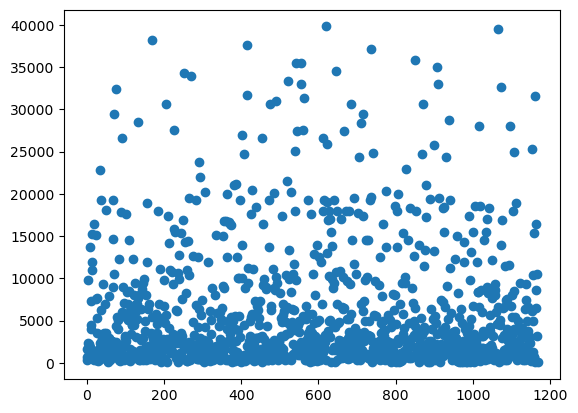

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

***2.8. Промежуточные выводы***

- Основная часть заказов до 10 000 рублей. Далее можно выделить среднее количество заказов в суммах от 10 ло 20 тысяч
- От 20 до 40 тысяч заказов совсем не много

### <a id='2.9'>2.9. Посчитаем 95-й и 99-й перцентили стоимости заказов</a>

In [43]:
# считаем перцентили

print(np.percentile(orders['revenue'], [90, 95, 99]))

[16929.   20394.   33591.45]


***Промежуточный вывод***

Видим что только 1% заказов стоимостью выше 33591 рубля. Это можно считать границей для определения аномальных значений

P.S. Я удалял аномальные значения на этапе подготовки данных к анализу и здесь делаю это второй раз

### <a id='2.10'>2.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a>

Сформулируем нулевую гипотезу:

**Статистически значемых различий в среднем количестве заказов на посетителя между группами 'A' и 'B' по "сырым" данным нет**

Сформулируем альтернативную гипотезу:

**Статистически значемые различия в среднем количестве заказов на посетителя между группами 'A' и 'B' по "сырым" данным есть**

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [45]:
# создадим переменные и сохраним в них пользователей
#  которые делали заказ хотя бы раз и укажем количество заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [46]:
# найдем количество заказов для пользователй из разных групп
# сохраним в переменные

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [47]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value = 0.010


***Промежуточный вывод***

Значение p-value 0.01 < 0.05 значит нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем


### <a id='2.11'>2.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a>

Сформулируем нулевую гипотезу:

**Статистически значемых различий в среднем чеке заказа между группами 'A' и 'B' по "сырым" данным нет**

In [48]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

p-value = 0.470


***Промежуточные выводы***

Значение p-value 0.47 больше 0.05, значит причин отвергнуть нулевую гипотезу нет. То есть в среднем чеке нет различий

### <a id='2.12'>2.12. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a>

In [49]:
max_revenue =  int(np.percentile(ordersByUsers["orders"], [99]))
max_revenue

4

In [50]:
# найдем количество аномальных пользователей
# в качестве границы отсечки будем исползовать данные, которые нашли выше

# сохраним в переменную значение перцентилей для отсечки аномальных значений
max_orders =  int(np.percentile(ordersByUsers['orders'], [99]))
max_revenue = int(np.percentile(orders['revenue'], [99]))

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

751     689129267
654     816783716
563     935349363
549    1367935136
420    1606766439
dtype: int64
16


Аномальных пользователей - 16 человек

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [52]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.015


***Промежуточный вывод***
- Значение p-value=0.015, что не на много больше значения по "сырым" данным (0.01)
- Делаем вывод, что результат по среднему количеству заказов практически не изменился

### <a id='2.13'>2.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a>

In [53]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

0.864


***Промежуточный вывод***

- p-value = 0.864  увеличилось относительно "неочищенных" данных (0.47)

- В среднем чеке по прежнему нет статистически значимых различий между группой А и B

### <a id='2.14'>Общие выводы</a>

- Изменения на сайте влияют непосредственно на реального посетителя, а реклама - на потенциального посетителя сайта;
- Проведя приоретизацию гипотез по увеличению выручки на сайте увидели, что на первое место вышли гипотезы которые работают с посетителями сайта;
- Согласно проведенной приоретизации первое, что можно сделать: **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** и **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**
- Гипотезы же рекламно-маркетнговые ушли ниже.

---
- По результатам A/B-тестирования группа 'B' показала лучше результат группы 'A' как по среднему чеку, так и по количеству заказов;
- На графиках среднего чека и среднего количества заказов видно преемущество группы 'B';
- Есть статистически значимые различия в среднем количестве заказов;
- При этом нет различий в среднем чеке.

Группа 'B' показала лучше результат чем группа 'A' - больше количество заказов. Видно, что нет тенденций к дальнейшему принципиальному изменению в группах. Поэтому тест можно завершить.